# LM10 - Extensive EDA & Analytics
# Lionel Messi - All Club Goals Stats

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta
import warnings
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\WASIU\Downloads\data.csv')
df_o = pd.read_csv(r'C:\Users\WASIU\Downloads\overall.csv')

## Basic Exploration

In [3]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,5/1/05,H,FC Barcelona,Albacete Balompie,2:0,CF,90+1,2:0,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11/2/05,H,FC Barcelona,Panathinaikos Athens,5:0,RW,34,3:0,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:1,RW,51,2:0,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:1,RW,50,2:1,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:0,CF,82,2:0,Left-footed shot,Ronaldinho Gaacho


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            683 non-null    object
 1   Competition       683 non-null    object
 2   Matchday          683 non-null    object
 3   Date              683 non-null    object
 4   Venue             683 non-null    object
 5   Club              683 non-null    object
 6   Opponent          683 non-null    object
 7   Result            683 non-null    object
 8   Playing_Position  683 non-null    object
 9   Minute            683 non-null    object
 10  At_score          683 non-null    object
 11  Type              682 non-null    object
 12  Goal_assist       474 non-null    object
dtypes: object(13)
memory usage: 69.5+ KB


In [5]:
df.describe(include= ['object']).T

,count,unique,top,freq
Season,683,18,11/12,73
Competition,683,7,LaLiga,474
Matchday,683,48,Group Stage,76
Date,683,439,3/7/12,5
Venue,683,2,H,410
Club,683,2,FC Barcelona,672
Opponent,683,88,Sevilla FC,38
Result,683,46,4:0,45
Playing_Position,683,9,CF,266
Minute,683,96,55,13


## Exploratory Data Analysis of Club goals

## Goals per competition

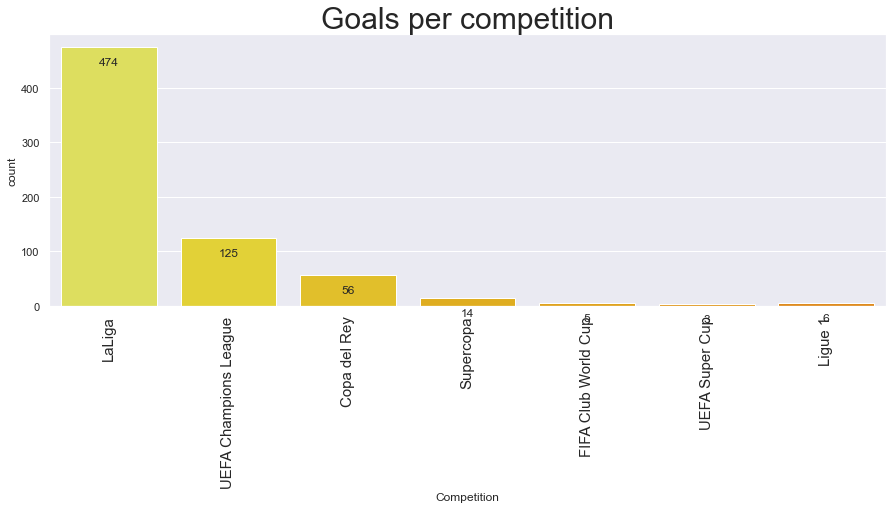

In [6]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Competition'],palette='Wistia')
p.axes.set_title("Goals per competition",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

Most of his goals are in Laliga

## Goals per season

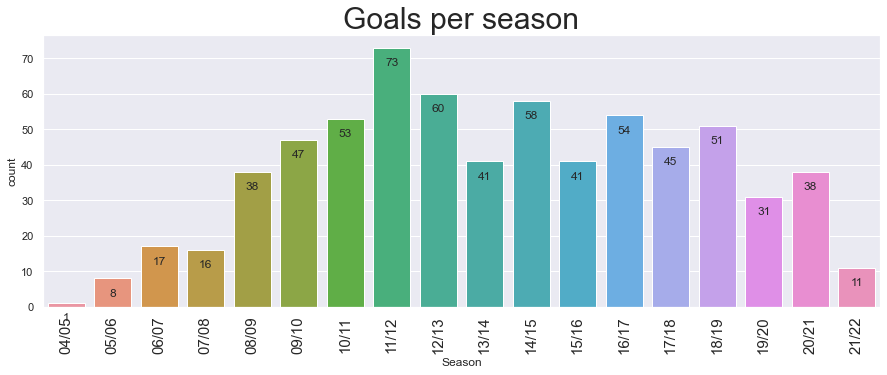

In [7]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Season'],hue_order=df.groupby('Competition'))
p.axes.set_title("Goals per season",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

Scored Most goals in 2011/2012 and 2012/2013

## Goals per Club

<AxesSubplot:title={'center':'Goals per Clubs Played'}, ylabel='Club'>

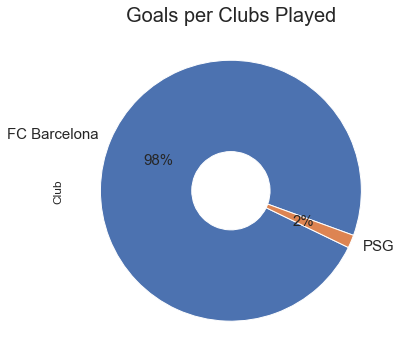

In [8]:
plt.figure(figsize=(6,6))
plt.title('Goals per Clubs Played', fontsize=20)
df.Club.value_counts().plot(kind='pie', labels=['FC Barcelona', 'PSG'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

## Goals per playing position

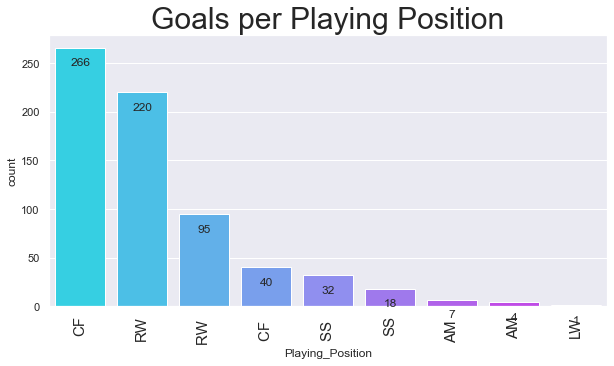

In [9]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Playing_Position'],palette='cool',order=df.Playing_Position.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Playing Position",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

In [10]:
mins=list(map(str, range(1,121)))
mins.insert(45,"1stE")
mins.insert(91,"2ndE")
mins.insert(122,"ExtE")

In [11]:
df.loc[df.Minute.str[:3]=='45+', 'Minute'] = '1stE'
df.loc[df.Minute.str[:3]=='90+', 'Minute'] = '2ndE'
df.loc[df.Minute.str[:4]=='120+', 'Minute'] = 'ExtE'

In [12]:
mins1=mins[:23]
mins2=mins[23:46]
mins3=mins[46:69]
mins4=mins[69:92]
mins5=mins[92:]

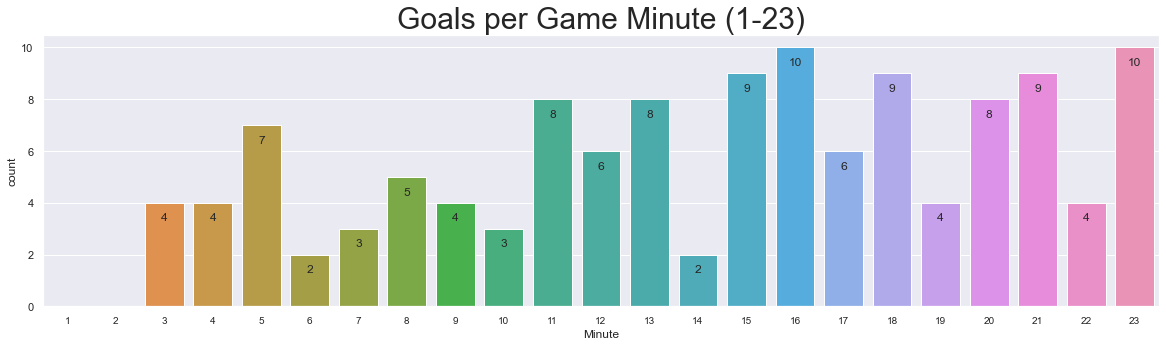

In [13]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10)
p=sns.countplot(df['Minute'],order=mins1)
p.axes.set_title("Goals per Game Minute (1-23)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

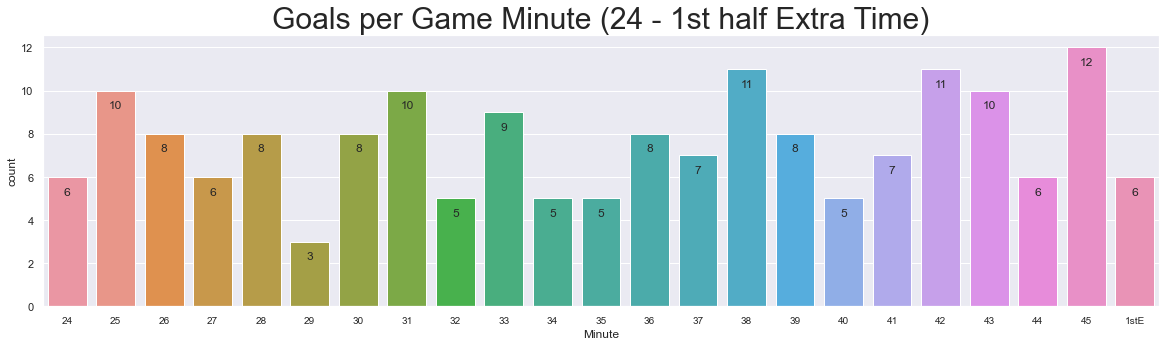

In [14]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10)
p=sns.countplot(df['Minute'],order=mins2)
p.axes.set_title("Goals per Game Minute (24 - 1st half Extra Time)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

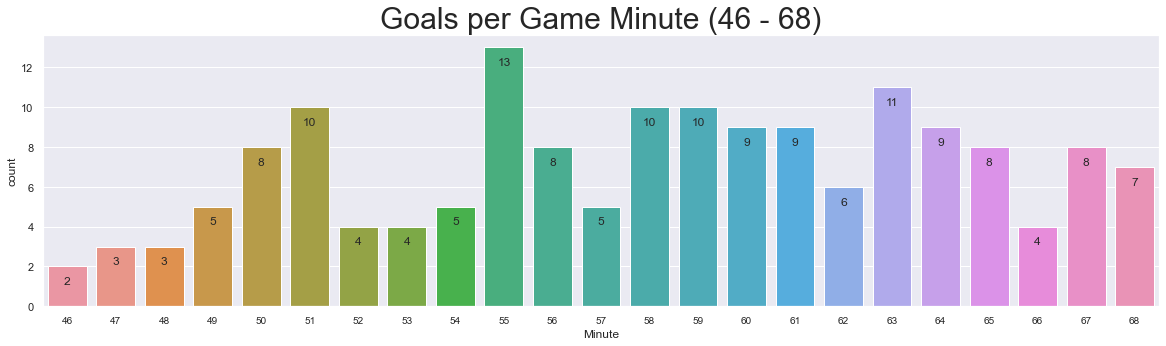

In [15]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10)
p=sns.countplot(df['Minute'],order=mins3)
p.axes.set_title("Goals per Game Minute (46 - 68)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20);

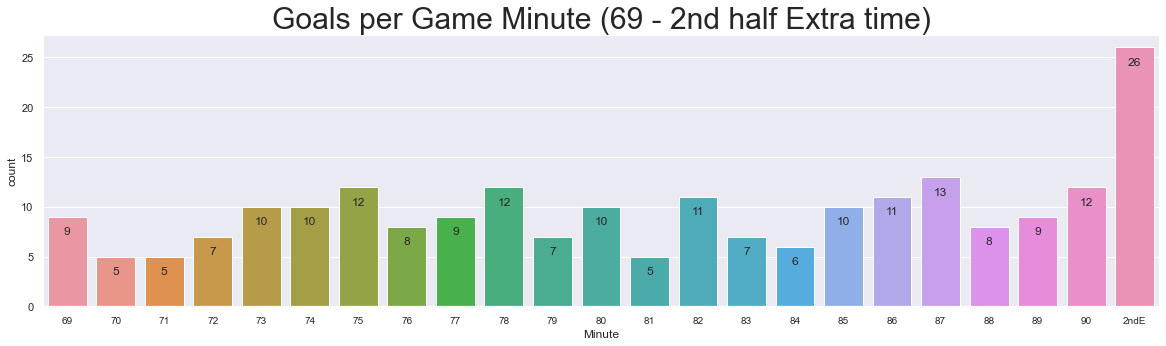

In [16]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10)
p=sns.countplot(df['Minute'],order=mins4)
p.axes.set_title("Goals per Game Minute (69 - 2nd half Extra time)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

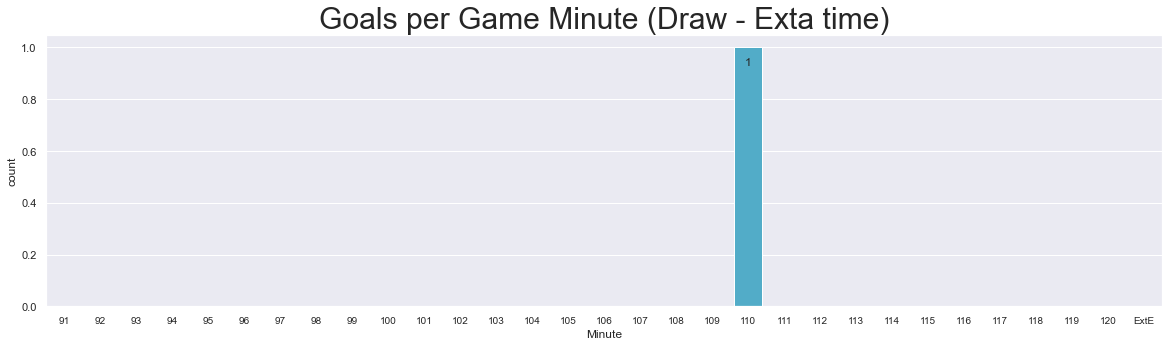

In [17]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10)
p=sns.countplot(df['Minute'],order=mins5)
p.axes.set_title("Goals per Game Minute (Draw - Exta time)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

He hasn't scored in the first and second minutes of the game

## Goal type per Game

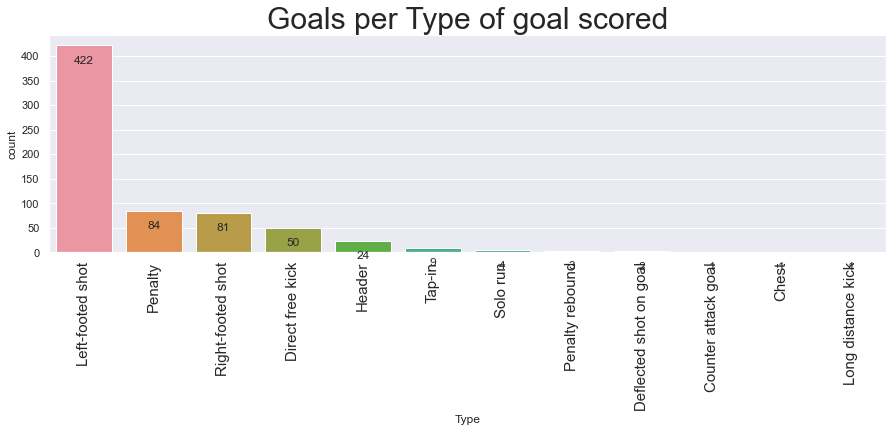

In [18]:
sns.set(rc={'figure.figsize':(15,4)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Type'],hue_order=df.groupby('Competition'),order=df.Type.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Type of goal scored",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

He's more dependent on his left foot

## Scoreline after scoring

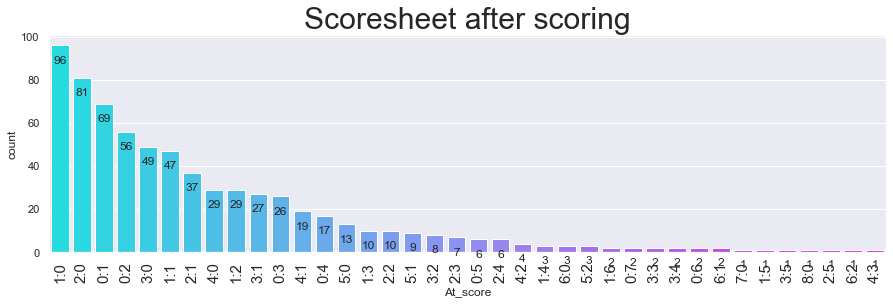

In [19]:
sns.set(rc={'figure.figsize':(15,4)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['At_score'], palette = 'cool' ,order=df.At_score.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Scoresheet after scoring",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

Score most of the opening goals

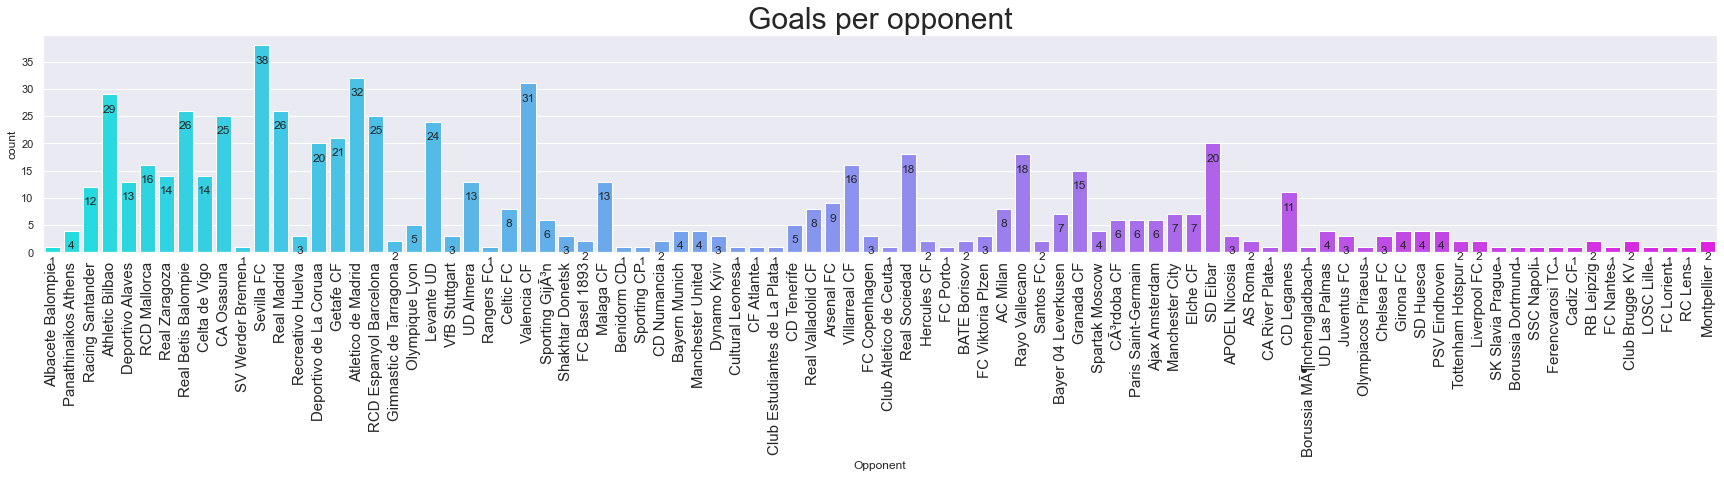

In [20]:
sns.set(rc={'figure.figsize':(30,4)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Opponent'], palette = 'cool' )
p.axes.set_title("Goals per opponent",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

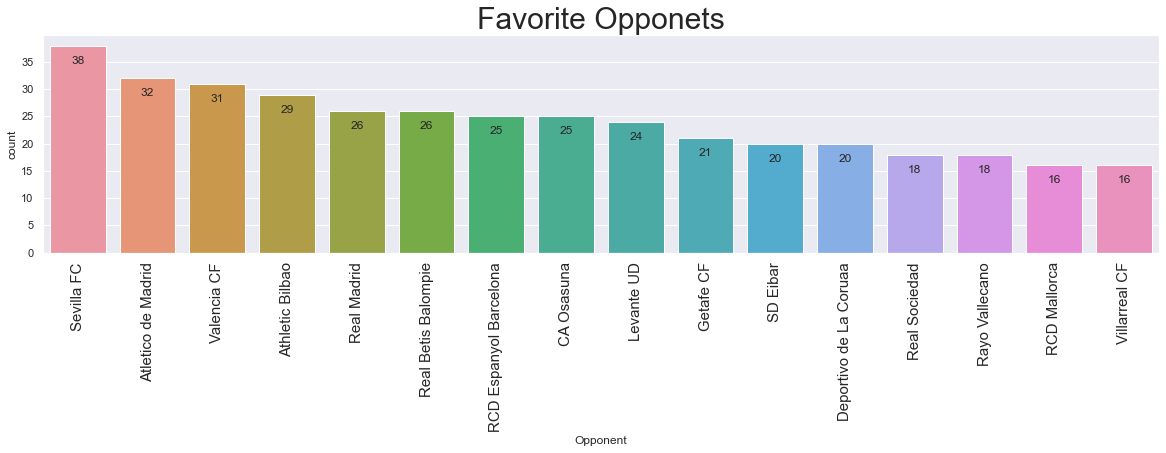

In [21]:
sns.set(rc={'figure.figsize':(20,4)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Opponent'],hue_order=df.groupby('Opponent'),order=df.Opponent.value_counts()[:16].index)
p.axes.set_title("Favorite Opponets",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

He scored most of his goals against Sevilla

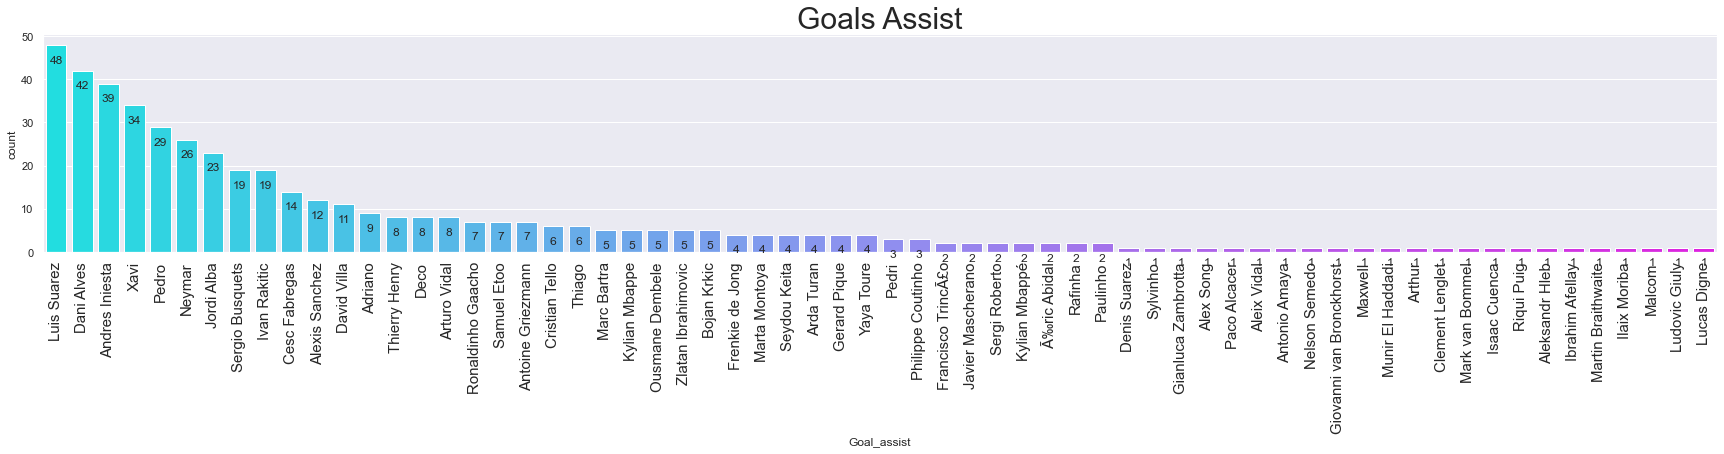

In [22]:
sns.set(rc={'figure.figsize':(30,4)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Goal_assist'], palette = 'cool', order = df.Goal_assist.value_counts().sort_values(ascending=False).index )
p.axes.set_title("Goals Assist",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

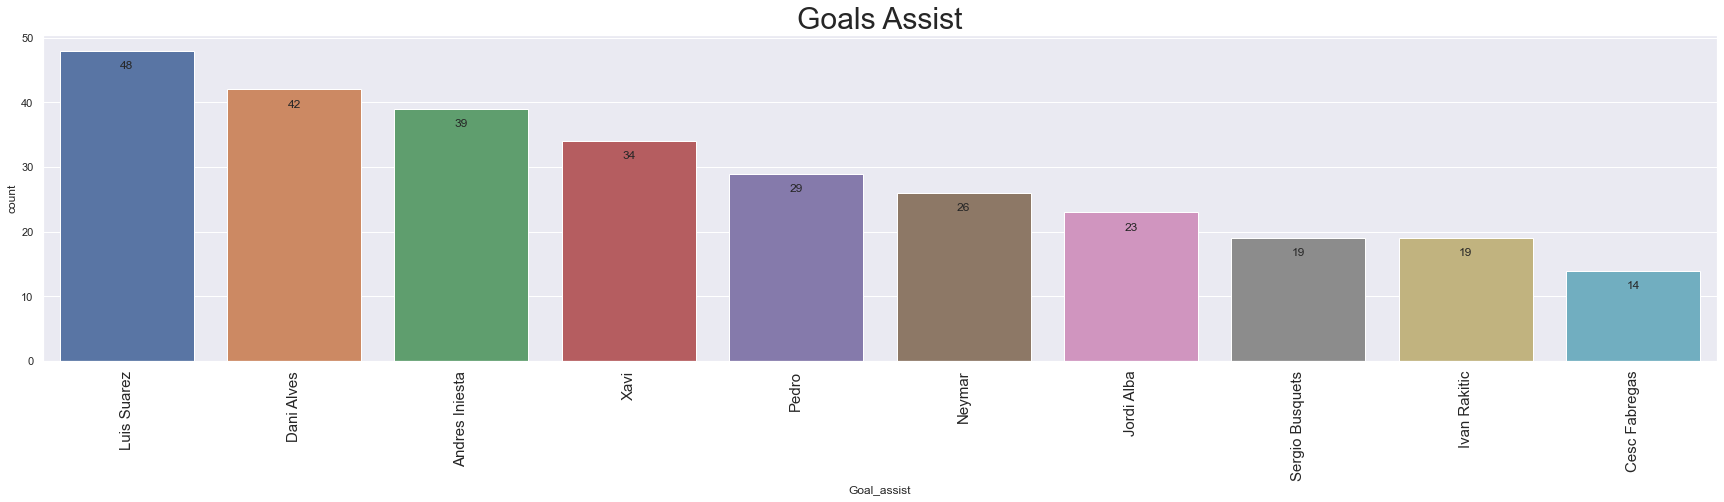

In [23]:
sns.set(rc={'figure.figsize':(30,6)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Goal_assist'], order = df.Goal_assist.value_counts().sort_values(ascending=False)[:10].index )
p.axes.set_title("Goals Assist",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

Suarez assisted most of goals followed by Dani Alves

<AxesSubplot:title={'center':'Goals per Clubs Played'}, ylabel='Venue'>

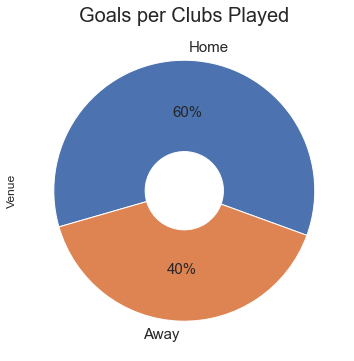

In [24]:
plt.figure(figsize=(6,6))
plt.title('Goals per Clubs Played', fontsize=20)
df.Venue.value_counts().plot(kind='pie', labels=['Home', 'Away'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

In [44]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,2005-05-01,H,FC Barcelona,Albacete Balompie,2:0,CF,2ndE,2:0,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,2005-11-02,H,FC Barcelona,Panathinaikos Athens,5:0,RW,34,3:0,Left-footed shot,NaN
2,05/06,LaLiga,13,2005-11-27,H,FC Barcelona,Racing Santander,4:1,RW,51,2:0,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,2006-01-15,H,FC Barcelona,Athletic Bilbao,2:1,RW,50,2:1,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,2006-01-22,H,FC Barcelona,Deportivo Alaves,2:0,CF,82,2:0,Left-footed shot,Ronaldinho Gaacho


In [42]:
fig = px.scatter(df, 'Date', title = r"Total Trendline of Messi's Goals",  )
fig.update_traces(mode = 'lines')